In [2]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
#Loading the data
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

#Normalize pixel values b/w 0 and 1
train_images, test_images = train_images/255.0 , test_images/255.0

169009152/169001437 [==============================] - 14s 0us/step


# *CNN MODEL*

In [15]:
#Create Convolution Base
#input shape--> 32X32 image in cifar and 3 because of RGB
model = Sequential()
model.add(Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation='relu'))       
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3), activation='relu'))       
model.add(MaxPooling2D((2,2)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 256)         0         
Total params: 370,816
Trainable params: 370,816
Non-trainable params: 0
________________________________________________

In [16]:
#Flatten

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)             

In [19]:
#Compiling the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs = 100, validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7190 - accuracy: 0.5237 - val_loss: 2.6160 - val_accuracy: 0.3697
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6183 - accuracy: 0.5502 - val_loss: 2.7067 - val_accuracy: 0.3717
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5294 - accuracy: 0.5678 - val_loss: 2.8663 - val_accuracy: 0.3584
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4416 - accuracy: 0.5894 - val_loss: 2.9015 - val_accuracy: 0.3668
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3581 - accuracy: 0.6105 - val_loss: 3.0659 - val_accuracy: 0.3531
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2794 - accuracy: 0.6283 - val_loss: 3.1636 - val_accuracy: 0.3610
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2062 - accuracy: 0.6468 - val_loss: 3.2106 - val_ac

313/313 [==============================] - 1s 3ms/step - loss: 11.2690 - accuracy: 0.3133


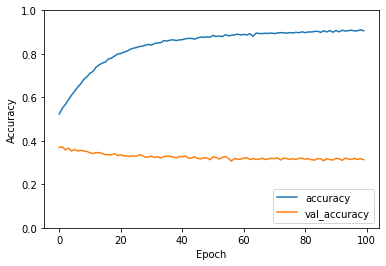

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

test_loss, test_acc_cnn = model.evaluate(test_images, test_labels)

In [21]:
print(test_acc_cnn)

0.3133000135421753


# *FEED FORWARD NEURAL NETWORK*

In [23]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
dense_13 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_14 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_15 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               12600     
Total params: 3,742,725
Trainable params: 3,742,725
Non-trainable params: 0
____________________________________________

In [25]:
#Compiling the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels)) 

Epoch 1/100
1563/1563 [==============================] - 5s 3ms/step - loss: 3.2182 - accuracy: 0.2109 - val_loss: 3.4426 - val_accuracy: 0.1894
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 3.1825 - accuracy: 0.2196 - val_loss: 3.3862 - val_accuracy: 0.1918
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 3.1484 - accuracy: 0.2236 - val_loss: 3.4361 - val_accuracy: 0.1887
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 3.1250 - accuracy: 0.2273 - val_loss: 3.3990 - val_accuracy: 0.1980
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 3.0983 - accuracy: 0.2317 - val_loss: 3.4208 - val_accuracy: 0.1985
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 3.0656 - accuracy: 0.2370 - val_loss: 3.4653 - val_accuracy: 0.1929
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 3.0418 - accuracy: 0.2408 - val_loss: 3.4340 - val_ac

313/313 [==============================] - 1s 2ms/step - loss: 5.4689 - accuracy: 0.1887


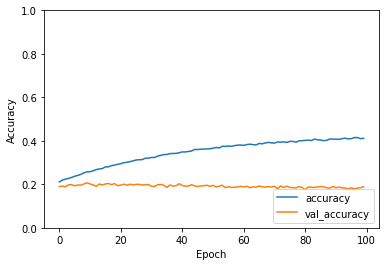

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

test_loss, test_acc_feed = model.evaluate(test_images, test_labels)

In [ ]:
print("CNN Test Accuracy:: ",test_acc_cnn)
print("Feed Forward Neural Network Test Accuracy:: ",test_acc_feed)